In [1]:
import numpy as np

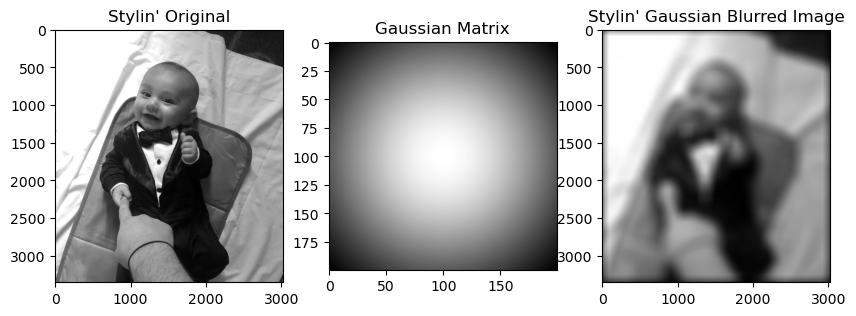

In [37]:
import numpy as np
from PIL import Image
from scipy.signal import fftconvolve
import matplotlib.pyplot as plt

# Define the 2D Gaussian kernel
def gaussian_kernel(size, sigma=1.0):
    kernel = np.fromfunction(
        lambda x, y: (1/ (2 * np.pi * sigma ** 2)) * 
                      np.exp(-((x - (size - 1) / 2) ** 2 + (y - (size - 1) / 2) ** 2) / (2 * sigma ** 2)),
        (size, size)
    )
    return kernel / np.sum(kernel)

# Load an example image using Pillow
image = Image.open('/mnt/sasa/ppt/image_50436609.JPG').convert('L')  # Open and convert to grayscale

# Convert the image to a NumPy array
image_array = np.array(image)

# Define the Gaussian kernel size and standard deviation
kernel_size = 200
sigma = 90.0

# Create the Gaussian kernel
gaussian_kernel_2d = gaussian_kernel(kernel_size, sigma)

# Perform FFT convolution between the image and the Gaussian kernel
convolved_image = fftconvolve(image_array, gaussian_kernel_2d, mode='same')

# Convert the result back to uint8 (assuming you want to visualize it)
convolved_image = np.uint8(convolved_image)

# Display the original image and the convolved image
plt.figure(figsize=(10, 5))
plt.subplot(1,3,1), plt.imshow(image_array, cmap='gray'), plt.title('Stylin\' Original')
plt.subplot(132), plt.imshow(gaussian_kernel_2d, cmap='gray'), plt.title('Gaussian Matrix')
plt.subplot(133), plt.imshow(convolved_image, cmap='gray'), plt.title('Stylin\' Gaussian Blurred Image')
plt.savefig('/mnt/sasa/ppt/gaussian_blur.png')
plt.show()


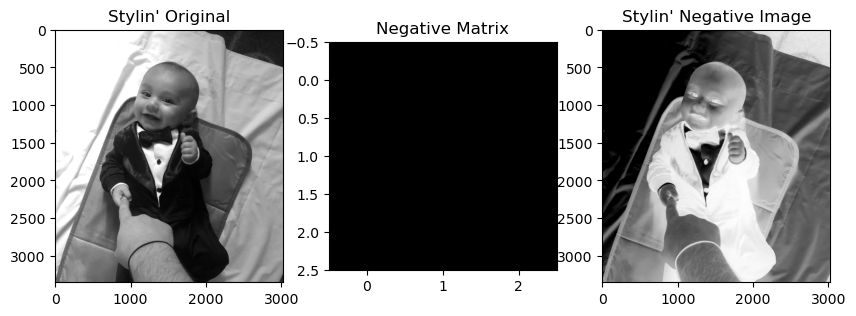

In [38]:
laplacian_kernel = np.array([[-1, -1, -1],
                             [-1,  -1, -1],
                             [-1, -1, -1]])
sharpened_image = fftconvolve(image_array, laplacian_kernel, mode='same')
sharpened_image = np.clip(sharpened_image, 0, 255)
sharpened_image = np.uint8(sharpened_image)
plt.figure(figsize=(10, 5))
plt.subplot(1,3,1), plt.imshow(image_array, cmap='gray'), plt.title('Stylin\' Original')
plt.subplot(132), plt.imshow(laplacian_kernel, cmap='gray'), plt.title('Negative Matrix')
plt.subplot(133), plt.imshow(convolved_image2, cmap='gray'), plt.title('Stylin\' Negative Image')
plt.savefig('/mnt/sasa/ppt/negative.png')
plt.show()


In [48]:
electrostatic_potential_kernel = np.zeros((100,100))
electrostatic_charge_kernel = np.zeros((100,100))

electrostatic_charge_kernel[45:55,45:55] = -1.

def distance(p, q):
    d = 0.
    for i in range(len(p)):
        d += (p[i]-q[i])**2
    return d

def coulombs_law(p, arr):
    for i in range(arr.shape[0]):
        for j in range(arr.shape[1]):
            dist = distance(p, np.array([i,j]))
            if dist != 0.:
                arr[i,j] = 1E9/(dist)**2
            else:
                arr[i,j] = 1E9
    return arr

coulombs_law(np.array([50,50]), electrostatic_potential_kernel)


array([[40.        , 41.63231827, 43.33053014, ..., 45.09647737,
        43.33053014, 41.63231827],
       [41.63231827, 43.36663139, 45.17318836, ..., 47.05417347,
        45.17318836, 43.36663139],
       [43.33053014, 45.17318836, 47.09502797, ..., 49.09862534,
        47.09502797, 45.17318836],
       ...,
       [45.09647737, 47.05417347, 49.09862534, ..., 51.23285723,
        49.09862534, 47.05417347],
       [43.33053014, 45.17318836, 47.09502797, ..., 49.09862534,
        47.09502797, 45.17318836],
       [41.63231827, 43.36663139, 45.17318836, ..., 47.05417347,
        45.17318836, 43.36663139]])

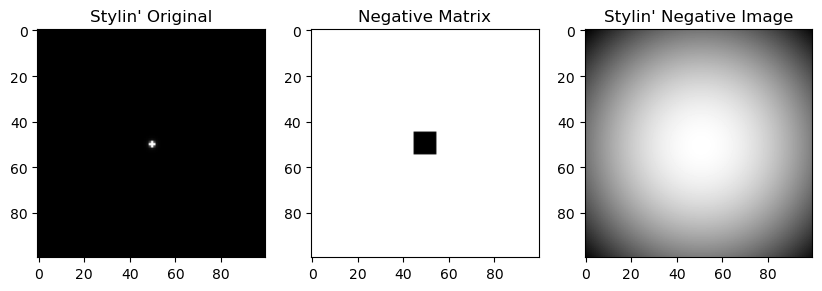

In [52]:
coulombs_law = fftconvolve(electrostatic_potential_kernel, gaussian_kernel_2d, mode='same')
# coulombs_law = coulombs_law
# sharpened_image = np.clip(sharpened_image, 0, 255)
sharpened_image = np.uint8(sharpened_image)
plt.figure(figsize=(10, 5))
plt.subplot(1,3,1), plt.imshow(electrostatic_potential_kernel, cmap='gray'), plt.title('Stylin\' Original')
plt.subplot(132), plt.imshow(electrostatic_charge_kernel, cmap='gray'), plt.title('Negative Matrix')
plt.subplot(133), plt.imshow(coulombs_law, cmap='gray'), plt.title('Stylin\' Negative Image')
plt.savefig('/mnt/sasa/ppt/negative.png')
plt.show()

In [51]:
gaussian_kernel.shape

AttributeError: 'function' object has no attribute 'shape'

Slope: 2.077176249507016
Intercept: -23.431481763277468
R-squared value: 0.6917795192842628


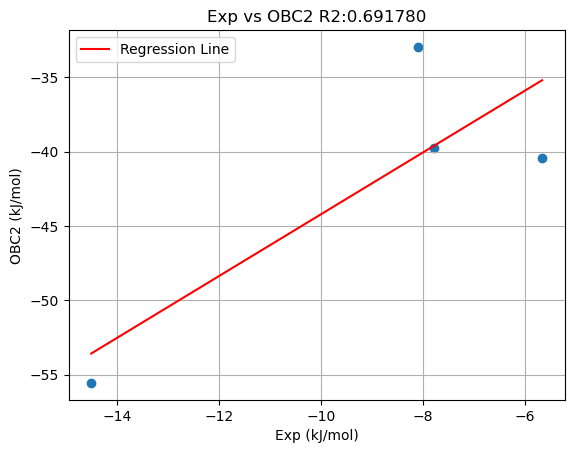

In [64]:
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt

# Data
# Exp = [-14.17, -14.51, -13.23, -15.56, -7.79, -13.23, -17.32, -7.31, -8.09, -11.26, -5.66]
# OBC2 = [-57.554565163641, -55.5486309846342, -68.2759264321276, -92.7689317795777,
#         -39.7129643193764, -68.2759264321276, -134.624855758245, -74.8860705570295,
#         -32.9465809212816, -45.1243377383696, -40.3999546225456]
# Exp = [-17.32,-15.56,-14.17,-7.31,-14.51,-8.09,-7.79,-5.66]
# OBC2 = [-134.624855758245,-92.7689317795777,-57.554565163641,-74.8860705570295,-55.5486309846342,-32.9465809212816,-39.7129643193764,-40.3999546225456]
Exp = [-14.51,-8.09,-7.79,-5.66]
OBC2 = [-55.5486309846342,-32.9465809212816,-39.7129643193764,-40.3999546225456]



# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(Exp, OBC2)

# Print regression results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared value: {r_value**2}")

# Plot the data and regression line
plt.scatter(Exp, OBC2)
plt.plot(Exp, [slope * x + intercept for x in Exp], color='red', label='Regression Line')
plt.xlabel('Exp (kJ/mol)')
plt.ylabel('OBC2 (kJ/mol)')
plt.legend()
plt.title(f'Exp vs OBC2 R2:{r_value**2:2f}')
plt.grid(True)

# Display the plot
plt.show()


a: -1.3211083392395269
b: -24.511465040602257
c: -152.87894198014266


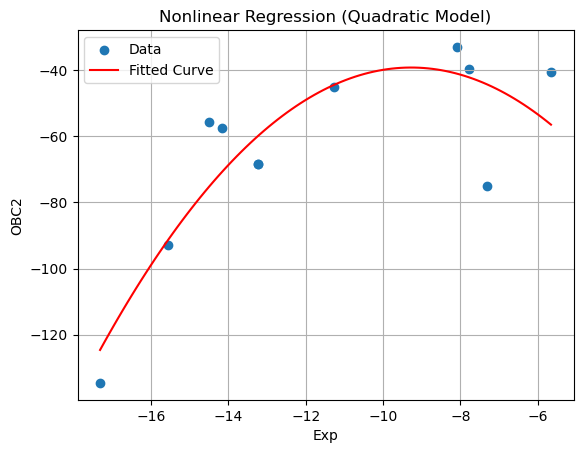

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the nonlinear model (quadratic)
def quadratic_model(x, a, b, c):
    return a * x**2 + b * x + c

# Data
Exp = [-14.17, -14.51, -13.23, -15.56, -7.79, -13.23, -17.32, -7.31, -8.09, -11.26, -5.66]
OBC2 = [-57.554565163641, -55.5486309846342, -68.2759264321276, -92.7689317795777,
        -39.7129643193764, -68.2759264321276, -134.624855758245, -74.8860705570295,
        -32.9465809212816, -45.1243377383696, -40.3999546225456]

# Perform nonlinear regression
params, covariance = curve_fit(quadratic_model, Exp, OBC2)

# Extract the fitted parameters
a, b, c = params

# Print the fitted parameters
print(f"a: {a}")
print(f"b: {b}")
print(f"c: {c}")

# Generate predicted values
x_fit = np.linspace(min(Exp), max(Exp), 100)
y_fit = quadratic_model(x_fit, a, b, c)

# Plot the data and fitted curve
plt.scatter(Exp, OBC2, label='Data')
plt.plot(x_fit, y_fit, color='red', label='Fitted Curve')
plt.xlabel('Exp')
plt.ylabel('OBC2')
plt.legend()
plt.title('Nonlinear Regression (Quadratic Model)')
plt.grid(True)

# Display the plot
plt.show()

In [4]:
import pickle as p
a = p.load(open("all_scores_with_native.p", "rb"))
b = p.load(open("dockq_results_with_native.p", "rb"))

In [18]:
import numpy as np
count1 = 0
for val in a:
    if np.max(val[:1])>0.23:
        count1 += 1
print(count1)

166


In [10]:
len(a)

174

In [14]:
a[:][:1]

[[0.03, 0.03, 0.03, 0.042, 0.03, 0.041, 0.042, 0.03, 0.041, 0.041]]